<a href="https://colab.research.google.com/github/EduuuCR/College-Projects/blob/main/ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 51s 141ms/step - accuracy: 0.2939 - loss: 1.9317 - val_accuracy: 0.4870 - val_loss: 1.4492
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - accuracy: 0.4849 - loss: 1.4464 - val_accuracy: 0.5532 - val_loss: 1.3079
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 141ms/step - accuracy: 0.5335 - loss: 1.3176 - val_accuracy: 0.5950 - val_loss: 1.1691
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 135ms/step - accuracy: 0.5718 - loss: 1.2244 - val_accuracy: 0.6138 - val_loss: 1.1439
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 132ms/step - accuracy: 0.5890 - loss: 1.1803 - val_accuracy: 0.6308 - val_loss: 1.0782
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 46s 130ms/step - accuracy: 0.6052 - loss: 1.1346 - val_accuracy: 0.6234 - val_loss: 1.0704
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 85s 139ms/step - accuracy: 0.6212 - loss: 1.0965 - val_accuracy: 0.6624 - val_loss: 1.0036
Epoch 8/10
352/352 ━━━━━━━━━━━

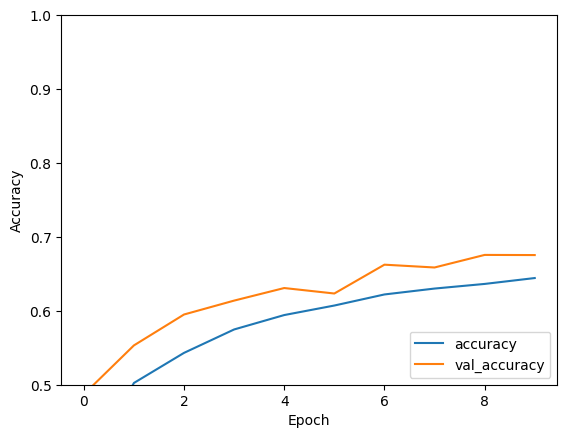

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


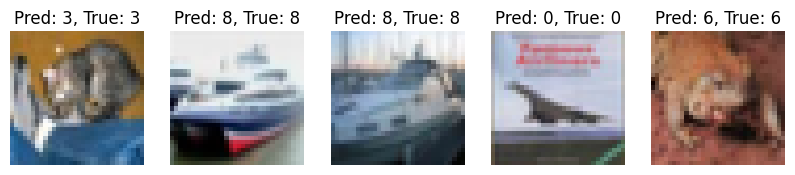

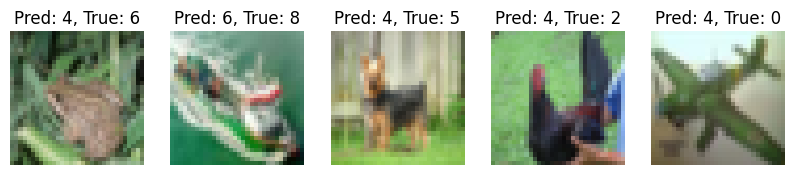

In [7]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Carregar o conjunto de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalizar os dados de imagem
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Converter os rótulos para one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Definir o modelo CNN
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Compilar o modelo
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Treinar o modelo
batch_size = 128
epochs = 10 # Reduzi o número de épocas para demonstração
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


# Avaliar o modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plotar o histórico de treinamento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


# Exibir algumas imagens corretamente e erroneamente classificadas
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]


# Exibir algumas imagens corretamente classificadas
plt.figure(figsize=(10, 5))
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_test[correct_indices[i]])
  plt.title(f"Pred: {predicted_labels[correct_indices[i]]}, True: {true_labels[correct_indices[i]]}")
  plt.axis('off')
plt.show()

# Exibir algumas imagens incorretamente classificadas
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[incorrect_indices[i]])
    plt.title(f"Pred: {predicted_labels[incorrect_indices[i]]}, True: {true_labels[incorrect_indices[i]]}")
    plt.axis('off')
plt.show()